# K Nearest Neighbour

### Import basic libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import dataset

In [2]:
df = pd.read_csv("/work/Personal_CG_Learning/REBELWAY/Intro_to_Machine_Learning/Source/Datasets/Intelligent_Irrigation_System.csv")

### Doing EDA...

In [3]:
df.head()

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   crop      200 non-null    object
 1   moisture  200 non-null    int64 
 2   temp      200 non-null    int64 
 3   pump      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
df.describe()

,moisture,temp,pump
count,200.000000,200.000000,200.000000
mean,633.085000,27.750000,0.750000
std,279.077118,10.869602,0.434099
min,4.000000,10.000000,0.000000
25%,500.500000,18.000000,0.750000
50%,693.500000,28.000000,1.000000
75%,850.750000,38.000000,1.000000
max,1022.000000,45.000000,1.000000


Checking the balance of the data for label column (the column where we will do the prediction)

In [6]:
df['pump'].value_counts()

pump
1    150
0     50
Name: count, dtype: int64

### Cleaning

In [7]:
df.drop("crop", inplace=True, axis=1)

In [8]:
df.head()

,moisture,temp,pump
0,638,16,1
1,522,18,1
2,741,22,1
3,798,32,1
4,690,28,1


### Standarize Data

In [9]:
# Assign the data for standarization to new var
data = df.drop("pump", axis=1).values
# Calculating the mean value for all data in data var using Numpy
mean = np.mean(data, axis=0)
# Calc the STD (standart deviation value) using Numpy
std_dev = np.std(data, axis=0)

# Calc standarize data
standard_data = (data - mean) / std_dev

In [10]:
# Creating a new data set STD_DF with the same columns names but skipping lebels
std_df = pd.DataFrame(standard_data, columns=df.drop("pump", axis=1).columns)

In [11]:
std_df.head()

,moisture,temp
0,0.017656,-1.083709
1,-0.399043,-0.899248
2,0.387656,-0.530326
3,0.592413,0.391980
4,0.204452,0.023058


### Preparing sets for ML model

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = std_df
y = df["pump"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=67)

### Creating kNN model with SciKitLearn

In [15]:
# Importing kNN model from SciKitLearn
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# set K var for kNN model
k = 1

In [17]:
# Instantiation of the model class 
knn = KNeighborsClassifier(k)

In [18]:
# Fitting the model with training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
# Making a prediction
pred = knn.predict(X_test)

In [20]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1])

### Checking the metrics

In [21]:
# Importing modules for metrics check
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print("Confusion Matrix:")
print("-----------------")
print(confusion_matrix(y_test, pred))
print("")
print("Classification Report:")
print("----------------------")
print(classification_report(y_test, pred))

Confusion Matrix:
-----------------
[[13  1]
 [ 0 36]]

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.97      1.00      0.99        36

    accuracy                           0.98        50
   macro avg       0.99      0.96      0.97        50
weighted avg       0.98      0.98      0.98        50



### Doing the error rate

In [23]:
error_rate = []

limit = 25

for i in range(1, limit):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    error_rate.append(np.mean(pred_y != y_test))

Text(0, 0.5, 'Error rate values')

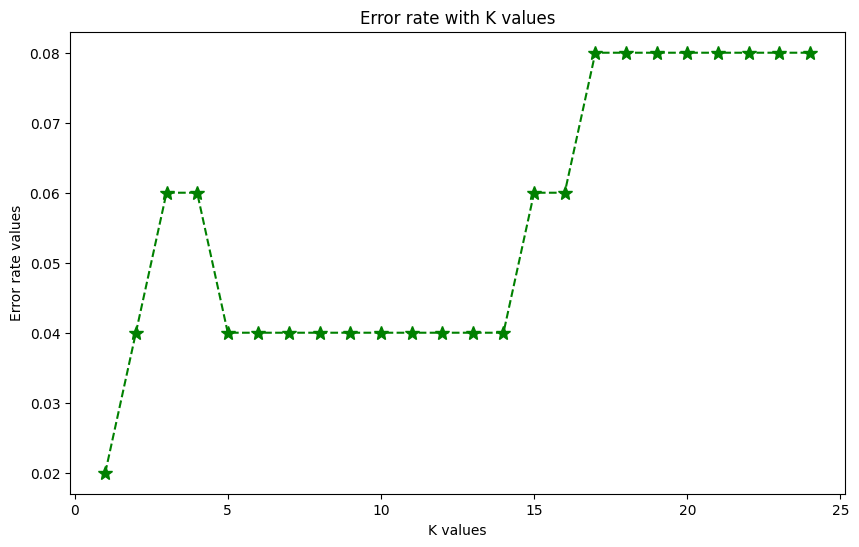

In [25]:
# Plotting the error rate data
plt.figure(figsize=(10,6))
plt.plot(range(1, limit), error_rate, color="green", linestyle="--", marker="*", markersize=10)
plt.title("Error rate with K values")
plt.xlabel("K values")
plt.ylabel("Error rate values")